In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#df = pd.read_csv('ZTF19aaafyjr_2020-04-30T00_12_32.238Z.csv')#AGN extendido https://alerce.online/object/ZTF19aaafyjr
df = pd.read_csv('ZTF18aavqlpk_2020-05-18T21_11_39.538Z.csv')#LPV puntual

print((df['sigmagnr'].values))
print((df['sigmapsf'].values))

print((df['magpsf'].values))
print((df['magnr'].values))

print(df['isdiffpos'].values)

df=df[(df['sigmapsf']<1.0) & (df['magpsf']<25) & (df['magpsf']>10)]

#lc_g = df.loc[df['fid']==1,:]
#lc_r = df.loc[df['fid']==2,:]

[0.015 0.015 0.025 0.025 0.015 0.015 0.025 0.015 0.025 0.015 0.015 0.025
 0.025 0.015 0.015 0.025 0.015 0.025 0.025 0.015 0.025 0.015 0.015 0.025
 0.015 0.025 0.025 0.025 0.015 0.025 0.025 0.015 0.025 0.015 0.025 0.015
 0.015 0.015 0.025 0.025 0.015 0.025 0.025 0.015 0.025 0.015 0.025 0.015
 0.025 0.015 0.025 0.025 0.015 0.015 0.025 0.025 0.015 0.025 0.015 0.025
 0.015 0.015 0.025 0.015 0.025 0.015 0.025 0.015 0.015 0.025 0.015 0.025
 0.025 0.015 0.025 0.015 0.015 0.015 0.015 0.015 0.025 0.015 0.015 0.025
 0.015 0.015 0.015 0.025 0.015 0.025 0.015 0.015 0.025 0.015 0.015 0.025
 0.025 0.015 0.015 0.025 0.015 0.025 0.015 0.025 0.025 0.015 0.015 0.015
 0.025 0.015 0.015 0.015 0.015 0.015 0.015 0.015 0.015 0.015 0.015 0.015
 0.015 0.025 0.015 0.015 0.025 0.015 0.015 0.025 0.015 0.025 0.025 0.015
 0.025 0.015 0.025 0.015 0.015 0.025 0.025 0.015 0.025 0.015 0.025 0.015
 0.025 0.015 0.025 0.015 0.025 0.025 0.025 0.015 0.015 0.025 0.015 0.025
 0.015 0.025 0.015 0.025 0.015 0.025 0.015 0.015 0.

In [3]:
#correction

auxref = 10 ** (-0.4 * df['magnr'])
auxdiff = 10 ** (-0.4 * df['magpsf'])
aux = auxref + df['isdiffpos'] * auxdiff

df['err_actual'] = np.sqrt((auxdiff * df['sigmapsf']) ** 2 + (auxref * df['sigmagnr']) ** 2) / aux
df['err_new_err'] = np.sqrt((auxdiff * df['sigmapsf']) ** 2 + (1-2*df['isdiffpos']) *(auxref * df['sigmagnr']) ** 2) / aux
df['err_no_ref'] = auxdiff*df['sigmapsf']/aux

df['mag_corr'] =   -2.5*np.log10(aux)

df=df[(df['err_no_ref']<2.0) & (df['mag_corr']<25) & (df['mag_corr']>10)]


lc_g = df.loc[df['fid']==1,:]
lc_r = df.loc[df['fid']==2,:]

print(np.min(lc_g['isdiffpos']))

-1


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [4]:
print(df['err_new_err'].values)

[0.04118865 0.04216555 0.2365404  0.16543223 0.04260017 0.04351292
 0.11849992 0.04479723 0.10529799 0.04407573 0.04490303 0.0993328
 0.10009001 0.04691487 0.04578946 0.11435623 0.0481504  0.11224785
 0.10152252 0.04834012 0.11179064 0.04815823 0.04845881 0.09768791
 0.04927929 0.09593121 0.15779011 0.16562016 0.06021546 0.15387043
 0.13157912 0.06470445 0.13426522 0.06144437 0.15852497 0.06776668
 0.07185567 0.06431497 0.22602765 0.20336983 0.06953147 0.23769319
 0.37091888 0.07223633 0.2382804  0.06654638 0.22168349 0.07180299
 0.23705639 0.07538382 0.21284522 0.18299521 0.0777975  0.08411434
 0.1946838  0.23175676 0.08540051 0.18677144 0.08889984 0.22850053
 0.08178584 0.08962643 0.22016252 0.09283198 0.21162515 0.09481067
 0.20296061 0.08153277 0.08560567 0.20688267 0.08976638 0.27457132
 0.30940985 0.09231483 0.21097212 0.08911588 0.08950118 0.0949165
 0.08618941 0.09326466 0.33153387 0.09250912 0.23576333 0.27324791
 0.10043341 0.10267788 0.08708321 0.22194445 0.09640218 0.212750

In [5]:
print((auxdiff.values * df['sigmapsf'].values) ** 2 + (1-2*df['isdiffpos'].values) *(auxref.values * df['sigmagnr'].values) ** 2)

[ 1.03194646e-15  1.03066892e-15  1.00509831e-17  6.66711327e-18
  1.02923928e-15  1.02885387e-15  4.05676864e-18  1.02821371e-15
  3.58700958e-18  1.02850571e-15  1.02788651e-15  3.46940203e-18
  2.90423973e-18  1.02775149e-15  1.02849971e-15  3.13309829e-18
  1.02759008e-15  3.00410966e-18  2.71654136e-18  1.02730506e-15
  3.34114872e-18  1.02946018e-15  1.02763683e-15  2.74967636e-18
  1.02725350e-15  2.69067920e-18  3.52116421e-18  8.39294113e-18
  1.37268914e-15  5.96900012e-18  4.93509485e-18  1.59052905e-15
  4.86267371e-18  1.32484298e-15  5.71368994e-18  1.56353633e-15
  1.70065557e-15  1.30064400e-15  9.57621417e-18  1.05700304e-17
  1.49419325e-15  1.11472375e-17  1.21856446e-17  1.61192301e-15
  1.01134573e-17  1.28017042e-15  6.43821286e-18  1.40794545e-15
  7.24528465e-18  1.54562709e-15  6.42217817e-18  6.53136776e-18
  1.55513451e-15  1.90291253e-15  8.01481386e-18  1.14033078e-17
  1.72099999e-15  5.35581883e-18  1.76269181e-15  1.04953756e-17
  1.40276885e-15  1.82063

In [6]:
print(df['isdiffpos'].values)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1

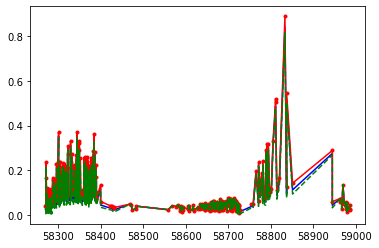

In [7]:
plt.plot(df['mjd'].values, df['err_actual'].values, 'b-')
plt.plot(df['mjd'].values, df['err_new_err'].values, 'r.-')
plt.plot(df['mjd'].values, df['err_no_ref'].values, 'g--')


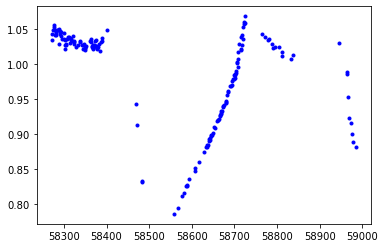

In [8]:
plt.plot(lc_g['mjd'].values,lc_g['magpsf'].values/lc_g['magnr'].values, 'b.')


<ErrorbarContainer object of 3 artists>

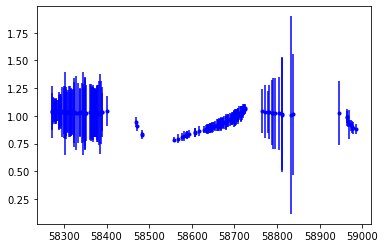

In [9]:
plt.errorbar(lc_g['mjd'].values,lc_g['magpsf'].values/lc_g['magnr'].values,yerr=lc_g['err_new_err'].values,fmt= 'b.')



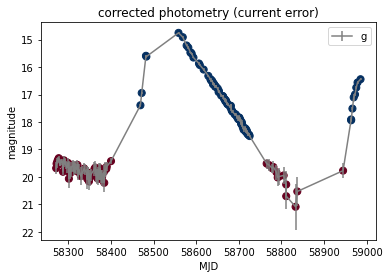

In [10]:

#plt.plot(lc_r['mjd'].values ,mag_diff_r,'ro')
plt.errorbar(lc_g['mjd'].values ,lc_g['mag_corr'].values,yerr=lc_g['err_actual'].values, fmt='', color='gray',ecolor='gray',label='g')
plt.scatter(lc_g['mjd'].values ,lc_g['mag_corr'].values, c=lc_g['isdiffpos'].values,s=50,cmap='RdBu')



#plt.errorbar(lc_r['mjd'].values ,lc_r['mag_corr'].values,yerr=lc_r['err_actual'].values, fmt='s', color='red',ecolor='red',label='r')
#plt.plot(lc_r['mjd'].values ,mag_diff_r,'s')
plt.legend()
plt.xlabel('MJD')
plt.ylabel('magnitude')
plt.title('corrected photometry (current error)')
#plt.ylim(18,21)
plt.gca().invert_yaxis()


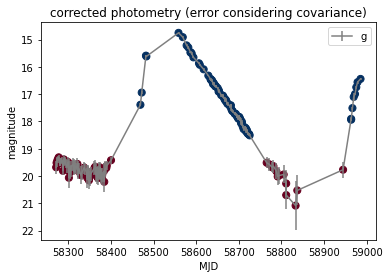

In [11]:

#plt.plot(lc_r['mjd'].values ,mag_diff_r,'ro')

plt.errorbar(lc_g['mjd'].values ,lc_g['mag_corr'].values,yerr=lc_g['err_new_err'].values, fmt='', color='gray',ecolor='gray',label='g')
plt.scatter(lc_g['mjd'].values ,lc_g['mag_corr'].values, c=lc_g['isdiffpos'].values,s=50,cmap='RdBu')


#plt.errorbar(lc_g['mjd'].values ,lc_g['mag_corr'].values,yerr=lc_g['err_new_err'].values, fmt='.', color='blue',ecolor='blue',label='g')
#plt.errorbar(lc_r['mjd'].values ,lc_r['mag_corr'].values,yerr=lc_r['err_new_err'].values, fmt='s', color='red',ecolor='red',label='r')
#plt.plot(lc_r['mjd'].values ,mag_diff_r,'s')
plt.legend()
plt.xlabel('MJD')
plt.ylabel('magnitude')
#plt.ylim(18,21)
plt.title('corrected photometry (error considering covariance)')
plt.gca().invert_yaxis()

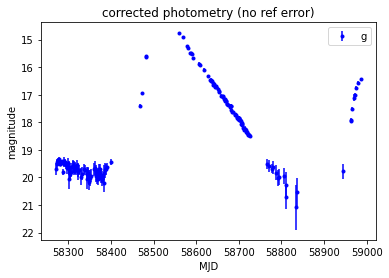

In [12]:

#plt.plot(lc_r['mjd'].values ,mag_diff_r,'ro')
plt.errorbar(lc_g['mjd'].values ,lc_g['mag_corr'].values,yerr=lc_g['err_no_ref'].values, fmt='.', color='blue',ecolor='blue',label='g')
#plt.errorbar(lc_r['mjd'].values ,lc_r['mag_corr'].values,yerr=lc_r['err_no_ref'].values, fmt='s', color='red',ecolor='red',label='r')
#plt.plot(lc_r['mjd'].values ,mag_diff_r,'s')
plt.legend()
plt.xlabel('MJD')
plt.ylabel('magnitude')
plt.title('corrected photometry (no ref error)')
#plt.ylim(18,21)
plt.gca().invert_yaxis()